# 1. Data Loading

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading The Data
df = pd.read_csv('../Datasets/zoo.data')
df.columns= ['animal_name','hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type']
original_df = df.copy()

In [4]:
# Display basic info
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

Dataset shape: (100, 18)

First 5 rows:


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [5]:
# Dataset information
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  100 non-null    object
 1   hair         100 non-null    int64 
 2   feathers     100 non-null    int64 
 3   eggs         100 non-null    int64 
 4   milk         100 non-null    int64 
 5   airborne     100 non-null    int64 
 6   aquatic      100 non-null    int64 
 7   predator     100 non-null    int64 
 8   toothed      100 non-null    int64 
 9   backbone     100 non-null    int64 
 10  breathes     100 non-null    int64 
 11  venomous     100 non-null    int64 
 12  fins         100 non-null    int64 
 13  legs         100 non-null    int64 
 14  tail         100 non-null    int64 
 15  domestic     100 non-null    int64 
 16  catsize      100 non-null    int64 
 17  type         100 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.2+ KB


In [6]:
# Basic statistics
print("\nDescriptive statistics:")
display(df.describe(include='all'))


Descriptive statistics:


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
unique,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,frog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.420000,0.200000,0.590000,0.400000,0.240000,0.360000,0.55,0.600000,0.820000,0.79000,0.08000,0.170000,2.830000,0.750000,0.130000,0.43000,2.850000
std,NaN,0.496045,0.402015,0.494311,0.492366,0.429235,0.482418,0.50,0.492366,0.386123,0.40936,0.27266,0.377525,2.040276,0.435194,0.337998,0.49757,2.105188
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,1.000000,1.00000,0.00000,0.000000,2.000000,0.750000,0.000000,0.00000,1.000000
50%,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00,1.000000,1.000000,1.00000,0.00000,0.000000,3.000000,1.000000,0.000000,0.00000,2.000000
75%,NaN,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.00,1.000000,1.000000,1.00000,0.00000,0.000000,4.000000,1.000000,0.000000,1.00000,4.000000


# 2. Data Pre-Processing

In [7]:
# Category Columns and Numeric Columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("\nCategorical columns:", categorical_cols)

# For categorical columns, let's see unique values
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Numerical columns: ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']

Categorical columns: ['animal_name']

Unique values in categorical columns:
animal_name: ['antelope' 'bass' 'bear' 'boar' 'buffalo' 'calf' 'carp' 'catfish' 'cavy'
 'cheetah' 'chicken' 'chub' 'clam' 'crab' 'crayfish' 'crow' 'deer'
 'dogfish' 'dolphin' 'dove' 'duck' 'elephant' 'flamingo' 'flea' 'frog'
 'fruitbat' 'giraffe' 'girl' 'gnat' 'goat' 'gorilla' 'gull' 'haddock'
 'hamster' 'hare' 'hawk' 'herring' 'honeybee' 'housefly' 'kiwi' 'ladybird'
 'lark' 'leopard' 'lion' 'lobster' 'lynx' 'mink' 'mole' 'mongoose' 'moth'
 'newt' 'octopus' 'opossum' 'oryx' 'ostrich' 'parakeet' 'penguin'
 'pheasant' 'pike' 'piranha' 'pitviper' 'platypus' 'polecat' 'pony'
 'porpoise' 'puma' 'pussycat' 'raccoon' 'reindeer' 'rhea' 'scorpion'
 'seahorse' 'seal' 'sealion' 'seasnake' 'seawasp' 'skimmer' 'skua'
 'slowworm' 'slu

In [8]:
# Verify normalization
print("\nBefore encoding:")
display(df.head())

# Label Encoding for categorical
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Verify the transformations
print("\nAfter encoding:")
display(df.head())


Before encoding:


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1



After encoding:


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


# 3. Exploratory Data Analysis (EDA)

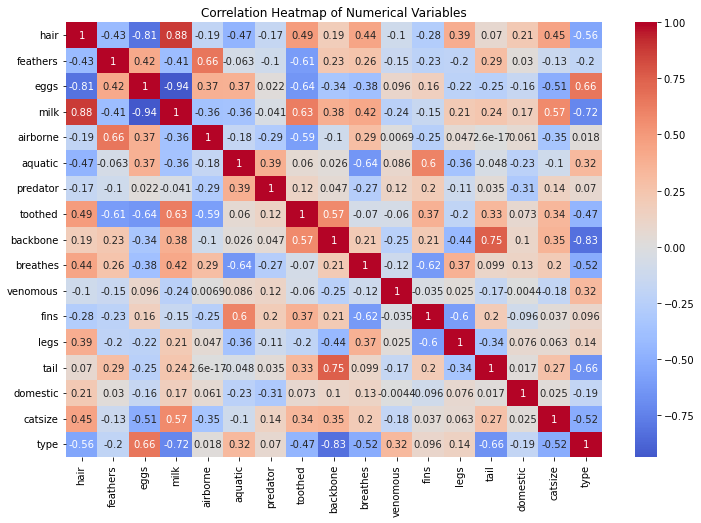

In [9]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

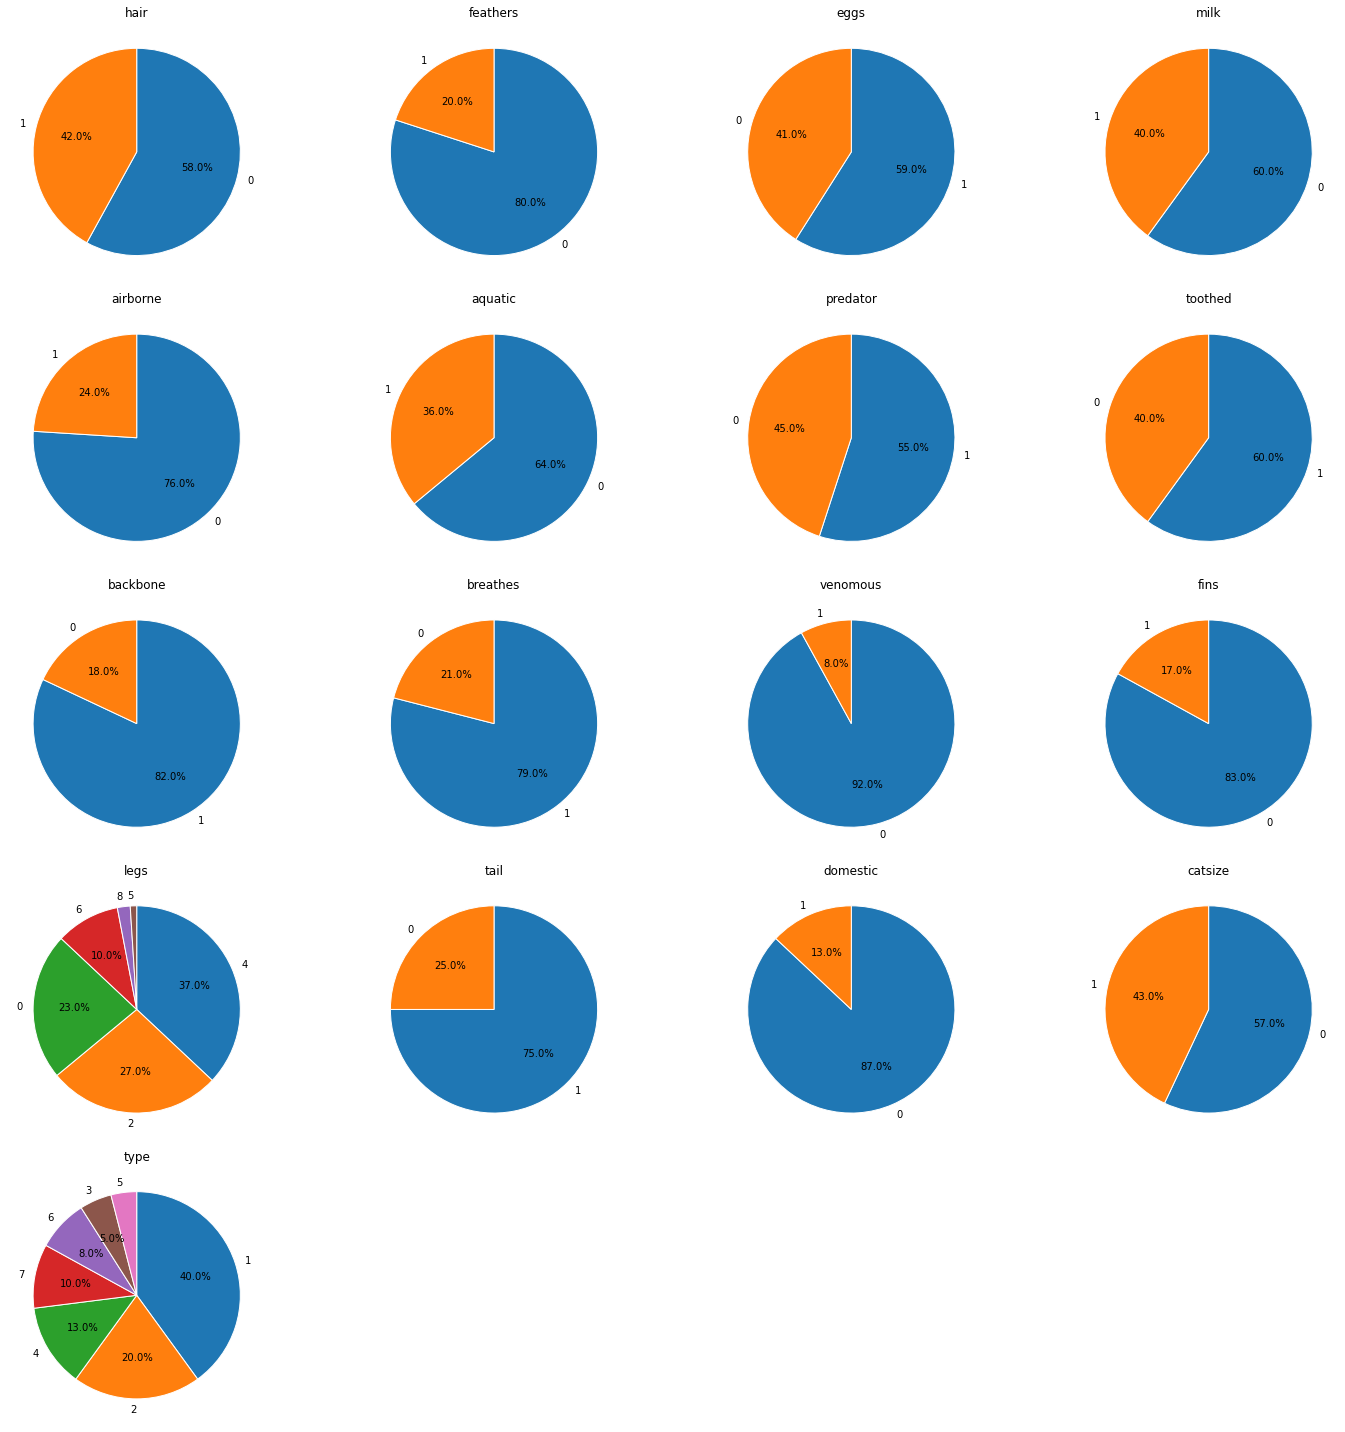

In [10]:
# Create subplots for pie charts
plt.figure(figsize=(20, 20))  # Increased figure size to accommodate all subplots

# Calculate grid dimensions dynamically
n_cols = 4  # Number of columns in subplot grid
n_rows = int(np.ceil(len(numerical_cols) / n_cols))  # Calculate needed rows

# Iterate through numerical features to create pie charts
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i+1)
    
    # Create pie chart with value counts
    value_counts = original_df[col].value_counts()
    if len(value_counts) > 10:  # If too many categories, show top 10
        value_counts = value_counts.nlargest(10)
        plt.title(f'Top 10 {col}')
    else:
        plt.title(col)
    
    value_counts.plot.pie(
        autopct=lambda p: f'{p:.1f}%' if p >= 5 else '',  # Only show % if >=5%
        startangle=90,
        counterclock=False,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
    )
    plt.ylabel('')  # Remove default ylabel

plt.tight_layout()
plt.show()

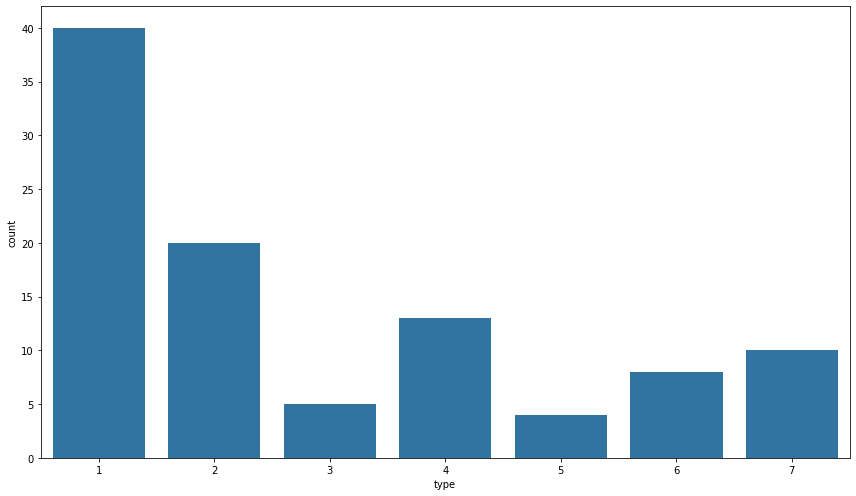

In [11]:
# Count plot for target
plt.figure(figsize = (12,7))
sns.countplot(x='type', data = df)
plt.tight_layout()
plt.show()

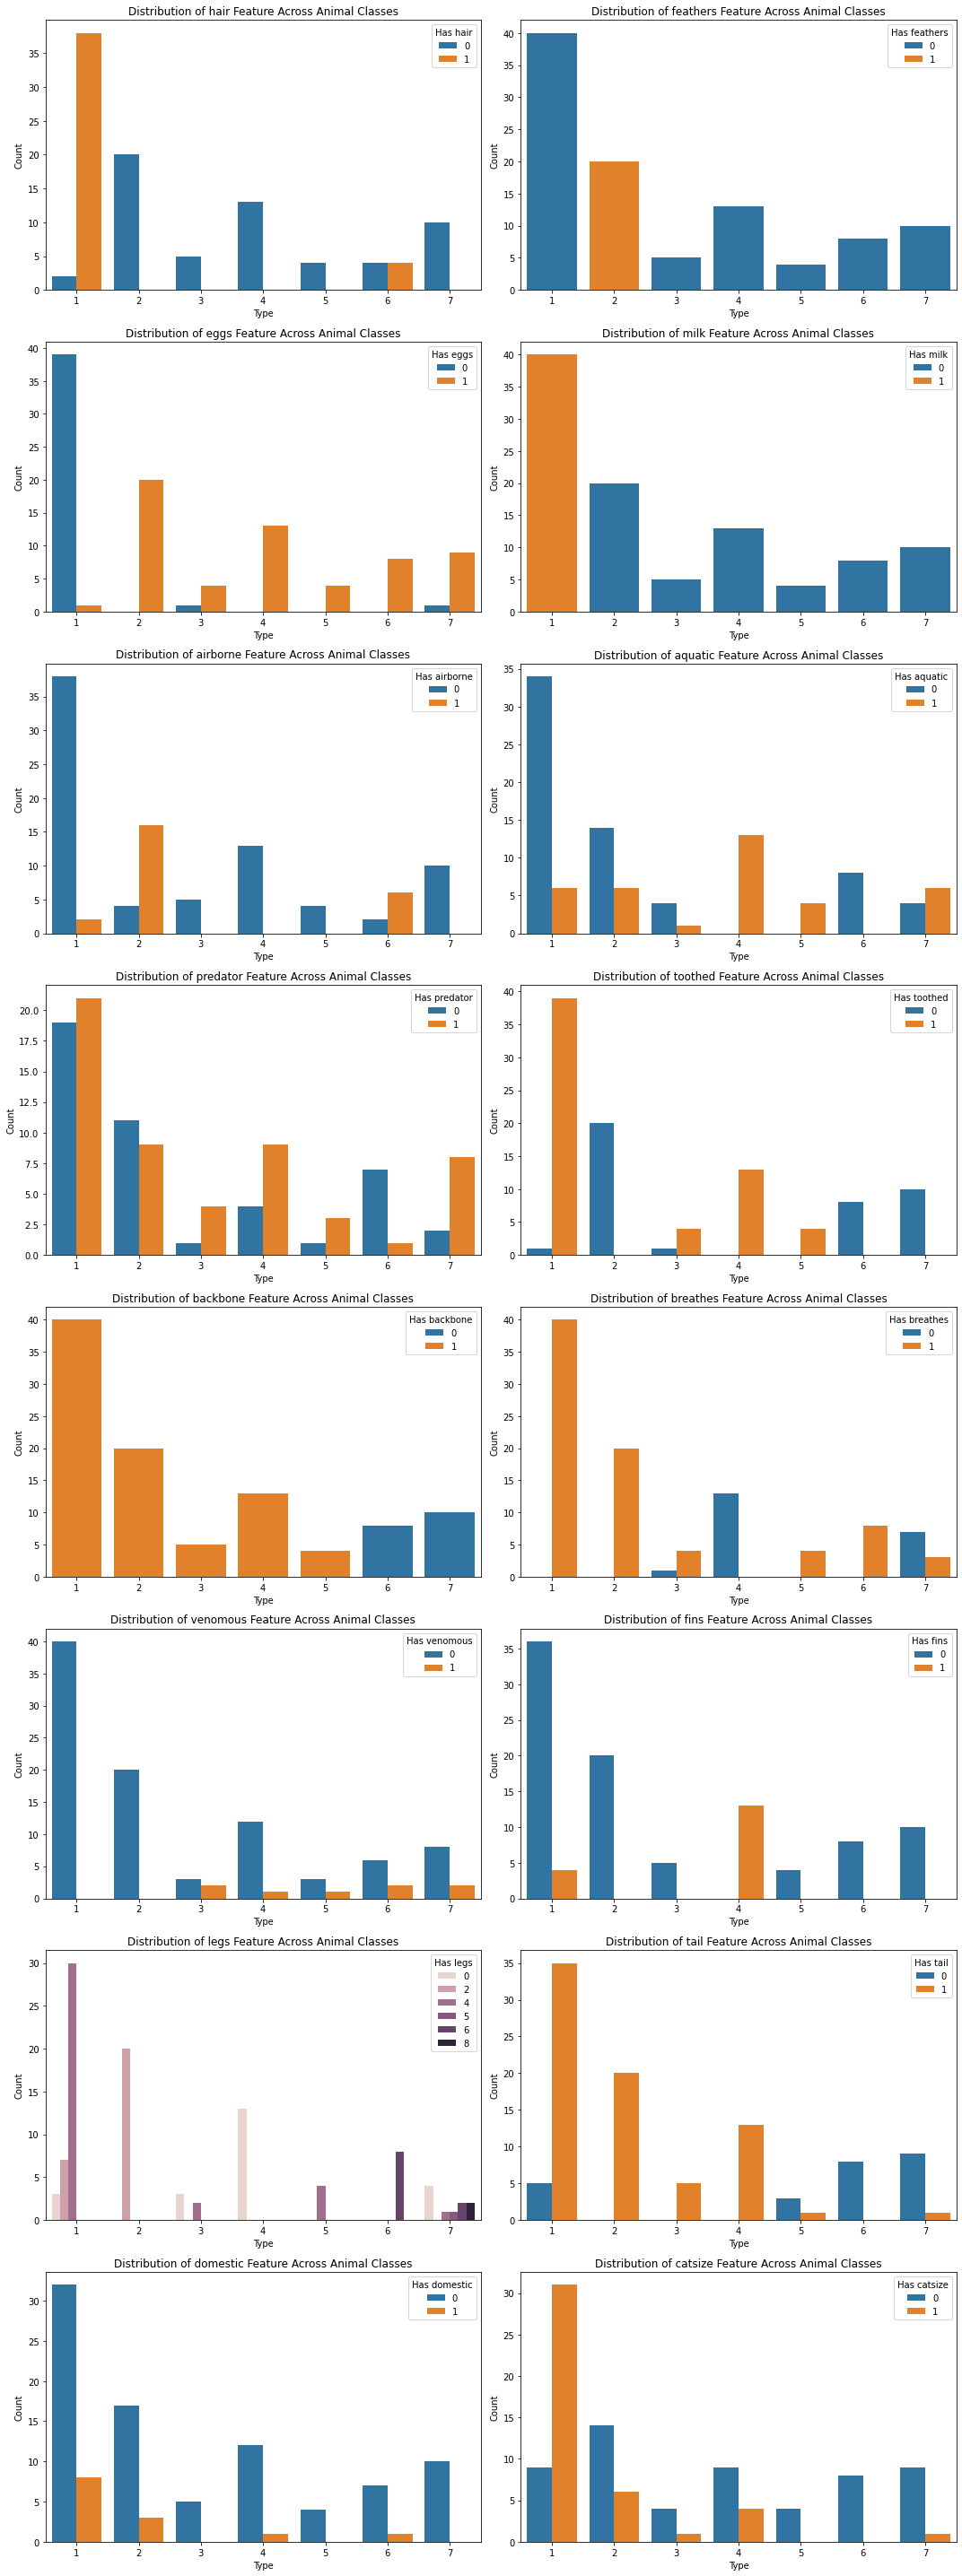

In [12]:
# Create subplots
fig, axes = plt.subplots(8, 2, figsize=(15, 40))  # 8 rows, 2 columns
axes = axes.flatten()

# Iterate through features
for i, col in enumerate(numerical_cols[:-1]):
    sns.countplot(x="type", hue=col, data=df, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} Feature Across Animal Classes")
    axes[i].set_xlabel("Type")
    axes[i].set_ylabel("Count")
    axes[i].legend(title=f"Has {col}")

# Adjust layout and display
plt.tight_layout()
plt.show()

In [13]:
# Checking Outliers
outlier_columns = numerical_cols[:]

for column in outlier_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    print(f"Outliers for {column} : {len(outliers)} / {len(df)} ({len(outliers)/len(df):.1%})")

Outliers for hair : 0 / 100 (0.0%)
Outliers for feathers : 20 / 100 (20.0%)
Outliers for eggs : 0 / 100 (0.0%)
Outliers for milk : 0 / 100 (0.0%)
Outliers for airborne : 24 / 100 (24.0%)
Outliers for aquatic : 0 / 100 (0.0%)
Outliers for predator : 0 / 100 (0.0%)
Outliers for toothed : 0 / 100 (0.0%)
Outliers for backbone : 18 / 100 (18.0%)
Outliers for breathes : 21 / 100 (21.0%)
Outliers for venomous : 8 / 100 (8.0%)
Outliers for fins : 17 / 100 (17.0%)
Outliers for legs : 2 / 100 (2.0%)
Outliers for tail : 25 / 100 (25.0%)
Outliers for domestic : 13 / 100 (13.0%)
Outliers for catsize : 0 / 100 (0.0%)
Outliers for type : 0 / 100 (0.0%)


In [14]:
# Winsorization (Handling Outliers)
winsorize_columns = numerical_cols[:]

def winsorize_iqr(series, factor=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - factor * iqr
    upper = q3 + factor * iqr
    return series.clip(lower, upper)

df[winsorize_columns] = df[winsorize_columns].apply(winsorize_iqr)
df[winsorize_columns].head(10)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0.0,0,1,0.0,0,0,1,1.0,1.0,0.0,0.0,4.0,1.000,0.0,1,1
1,0,0.0,1,0,0.0,1,1,1,1.0,1.0,0.0,0.0,0.0,1.000,0.0,0,4
2,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,0.375,0.0,1,1
3,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,1.000,0.0,1,1
4,1,0.0,0,1,0.0,0,0,1,1.0,1.0,0.0,0.0,4.0,1.000,0.0,1,1
5,1,0.0,0,1,0.0,0,0,1,1.0,1.0,0.0,0.0,4.0,1.000,0.0,1,1
6,0,0.0,1,0,0.0,1,0,1,1.0,1.0,0.0,0.0,0.0,1.000,0.0,0,4
7,0,0.0,1,0,0.0,1,1,1,1.0,1.0,0.0,0.0,0.0,1.000,0.0,0,4
8,1,0.0,0,1,0.0,0,0,1,1.0,1.0,0.0,0.0,4.0,0.375,0.0,0,1
9,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,1.000,0.0,1,1


# 4. Data Selection for Modeling

In [15]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0.0,0,1,0.0,0,0,1,1.0,1.0,0.0,0.0,4.0,1.000,0.0,1,1
1,1,0,0.0,1,0,0.0,1,1,1,1.0,1.0,0.0,0.0,0.0,1.000,0.0,0,4
2,2,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,0.375,0.0,1,1
3,3,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,1.000,0.0,1,1
4,4,1,0.0,0,1,0.0,0,0,1,1.0,1.0,0.0,0.0,4.0,1.000,0.0,1,1


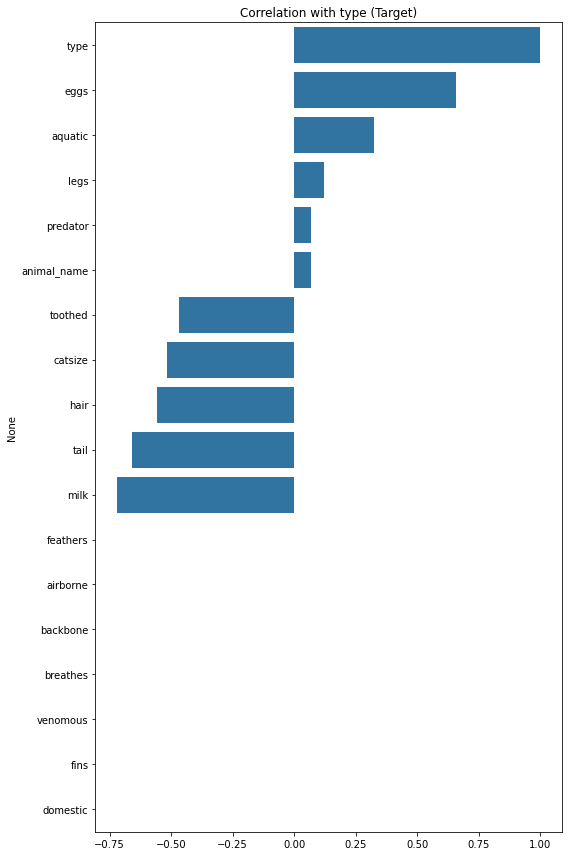

Selected features based on correlation:
['eggs', 'aquatic', 'legs', 'toothed', 'catsize', 'hair', 'tail', 'milk']


In [16]:
# Calculate correlations with target y
corr_with_target = df.corr()['type'].sort_values(ascending=False)

plt.figure(figsize=(8, 12))
sns.barplot(y=corr_with_target.index, x=corr_with_target.values)
plt.title('Correlation with type (Target)')
plt.tight_layout()
plt.show()

# Let's select features with correlation > 0.1 or < -0.1 (absolute value)
selected_features = corr_with_target[abs(corr_with_target) > 0.1].index.tolist()
selected_features.remove('type')  # Remove target variable

print("Selected features based on correlation:")
print(selected_features)

In [17]:
# Feature and Target Selection
feature_data = df[selected_features]
target_data = df["type"]

feature_train, feature_test, target_train, target_test = train_test_split(feature_data, target_data, test_size=0.2, random_state = 42, stratify = target_data)

# 5. Model Loading & Training

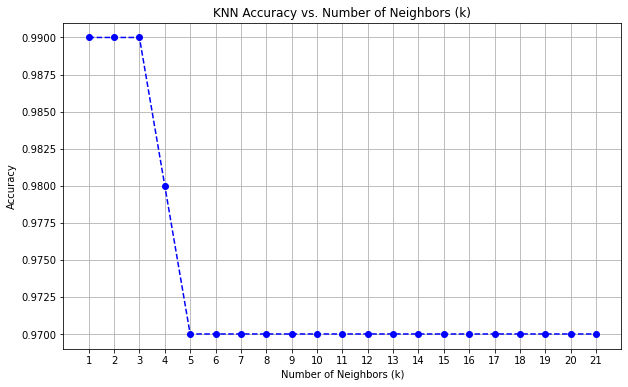

In [18]:
# Store accuracies for different k values
k_values = range(1, 22)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='minkowski', p=2)
    knn.fit(feature_train, target_train)
    predicted_test_data = knn.predict(feature_data)
    acc = accuracy_score(target_data, predicted_test_data)
    accuracies.append(acc)

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.title('KNN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='minkowski', p=2)
knn_model.fit(feature_train, target_train)

,n_neighbors,3
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


# 6. Model Predicting

In [20]:
# Prediction of Test Data
prediction_data = knn_model.predict(feature_test)

In [21]:
# Calculate metrics
feature_accuracy_score = accuracy_score(target_test, prediction_data)

feature_classification_report = classification_report(
    target_test, 
    prediction_data, 
    target_names=['1','2','3','4','5','6','7'],
    zero_division=0
)

conf_matrix = confusion_matrix(target_test, prediction_data)

print("Accuracy Score:", feature_accuracy_score)
print("\nClassification Report:\n", feature_classification_report)
print("\nConfusion Matrix:\n", conf_matrix)

print("\nUnique classes in test set:", np.unique(target_test))
print("Unique classes in predictions:", np.unique(prediction_data))

Accuracy Score: 0.95

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         2

    accuracy                           0.95        20
   macro avg       0.93      0.93      0.90        20
weighted avg       0.97      0.95      0.95        20


Confusion Matrix:
 [[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 1 0 1]]

Unique classes in test set: [1 2 3 4 5 6 7]
Unique classes in predictions: [1 2 3 4 5 6 7]


# 7. Verification & Reporting

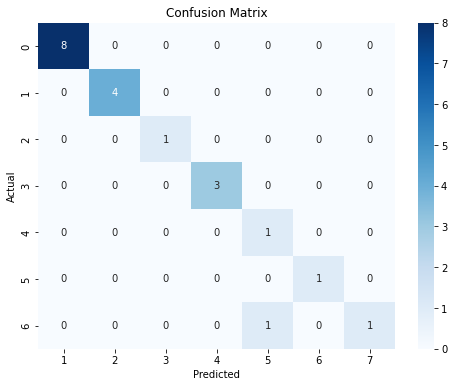

In [22]:
# Heat Map 
cm_df = pd.DataFrame(conf_matrix, columns=['1','2','3','4','5','6','7'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()